# Adsorption Models - Exercise

## Exercise 1: Breakthrough curve in a Column

Let us start working towards the task given by our colleagues. Try to set up your column dimensions to match the data from the lab book.

Two parameters are missing (we will fit them later). Take these placeholder values for now:

```
total_porosity = 0.4
axial_dispersion = 1e-6
```


We will stay in a simplified binding model for now by using the `Langmuir` binding model with two components with $k_{eq, i} = [2, 1]$, and $q_{max, i} = [1, 1]$.

Load the column with $c_{feed} = [1.0, 1.0]~mmol \cdot L^{-1} $ and a flow rate of $1 ~ml \cdot min^{-1}$ for $100~s$.

Try experimenting with:
- The time resolution.
- The binding strenth.
- The number of components.
- Modify how many components bind.
- Compare kinetic binding with rapid equilibrium.

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='$time~/~min$', ylabel='$c~/~mM$'>)

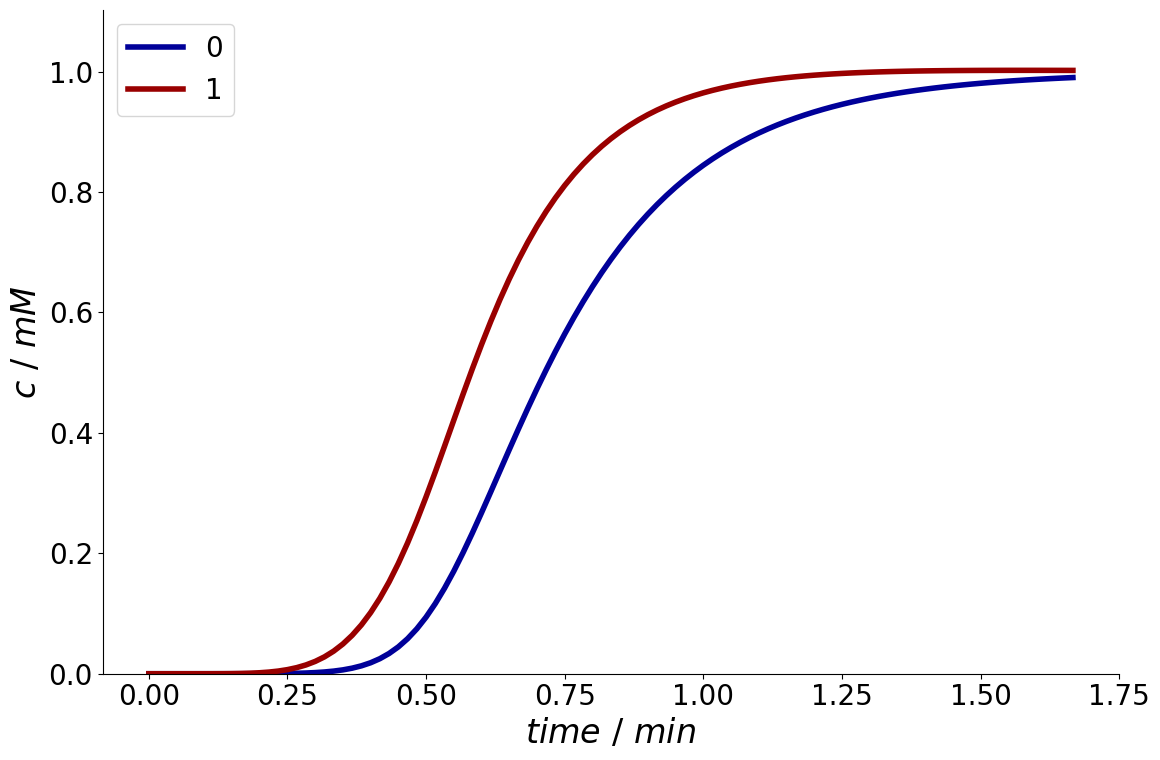

In [2]:
from CADETProcess.processModel import ComponentSystem, Inlet, Outlet, LumpedRateModelWithoutPores, Langmuir
component_system = ComponentSystem(2)

inlet = Inlet(component_system, "inlet")
inlet.flow_rate = 1 / 60 / 1000 / 1000
inlet.c = [[1, 0, 0, 0], [1, 0, 0, 0]]


outlet = Outlet(component_system, "outlet")

column = LumpedRateModelWithoutPores(component_system, "column")#
column.length = 0.014 
column.diameter = 0.01
column.total_porosity = 0.4
column.axial_dispersion = 1e-6

binding = Langmuir(component_system, "binding")
binding.adsorption_rate = [2, 1]
binding.desorption_rate = [1, 1]
binding.capacity = [1, 1]

column.binding_model = binding

column.solution_recorder.write_solution_bulk = True
column.solution_recorder.write_solution_solid = True

from CADETProcess.processModel import FlowSheet, Process
from CADETProcess.simulator import Cadet

flow_sheet = FlowSheet(component_system, "flow_sheet")
flow_sheet.add_unit(column)
flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)
flow_sheet.add_connection(inlet, column)
flow_sheet.add_connection(column, outlet)

process = Process(flow_sheet, "process")
process.cycle_time = 100

simulator = Cadet()
simulation_results = simulator.simulate(process)
simulation_results.solution.outlet.outlet.plot()

## Exercise 2: SMA Model in Column

Now get closer to the experiment performed by your colleague by using the `StericMassAction` adsorption model. Note, that the `StericMassAction` requires the first component to be a binding salt component.

For the binding model use these placeholder parameters:
```
is_kinetic = True
adsorption_rate = [0, 1e-5, 1e-1, 1e-3]
desorption_rate = [0, 1, 1, 1]
characteristic_charge = [0, 5, 1, 7]
steric_factor = [0, 1, 1, 1]
```
we will fit their true values later. You can find the capacity in the lab book.

Use a feed concentration of $c_{feed} = [50.0, 1.0, 1.0, 1.0]~mol \cdot m^{-3} $.

Try experimenting with:
- The binding strenth.
- The number of components.
- Modify how many components bind.
- Compare kinetic binding with rapid equilibrium.

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='$time~/~min$', ylabel='$c~/~mM$'>)

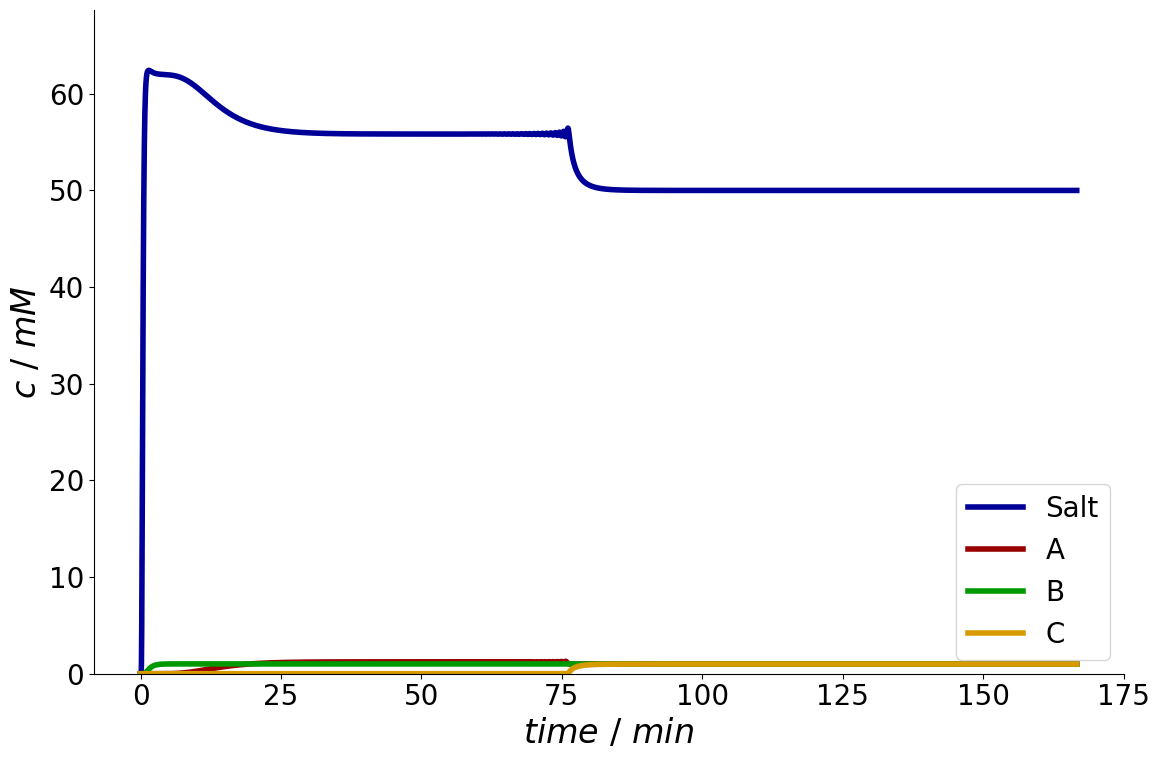

In [15]:
from CADETProcess.processModel import ComponentSystem, Inlet, Outlet, LumpedRateModelWithoutPores, StericMassAction
component_system = ComponentSystem(["Salt", "A", "B", "C"])

inlet = Inlet(component_system, "inlet")
inlet.flow_rate = 1 / 60 / 1000 / 1000
inlet.c = [[1.0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]]
inlet.c = [1, 1, 1, 1]
inlet.c = 1

outlet = Outlet(component_system, "outlet")

column = LumpedRateModelWithoutPores(component_system, "column")#
column.length = 0.014 
column.diameter = 0.01
column.total_porosity = 0.4
column.axial_dispersion = 1e-6

binding = StericMassAction(component_system, "binding")
binding.is_kinetic = True
binding.adsorption_rate = [0, 1e-5, 1e-1, 1e-3]
binding.desorption_rate = [0, 1, 1, 1]
binding.characteristic_charge = [0, 5, 1, 7]
binding.steric_factor = [0, 1, 1, 1]
binding.capacity  = 1200

column.binding_model = binding

from CADETProcess.processModel import FlowSheet, Process
from CADETProcess.simulator import Cadet

flow_sheet = FlowSheet(component_system, "flow_sheet")
flow_sheet.add_unit(column)
flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)
flow_sheet.add_connection(inlet, column)
flow_sheet.add_connection(column, outlet)

process = Process(flow_sheet, "process")
process.cycle_time = 10000

simulator = Cadet()
sim_results = simulator.simulate(process)
sim_results.solution.outlet.outlet.plot()

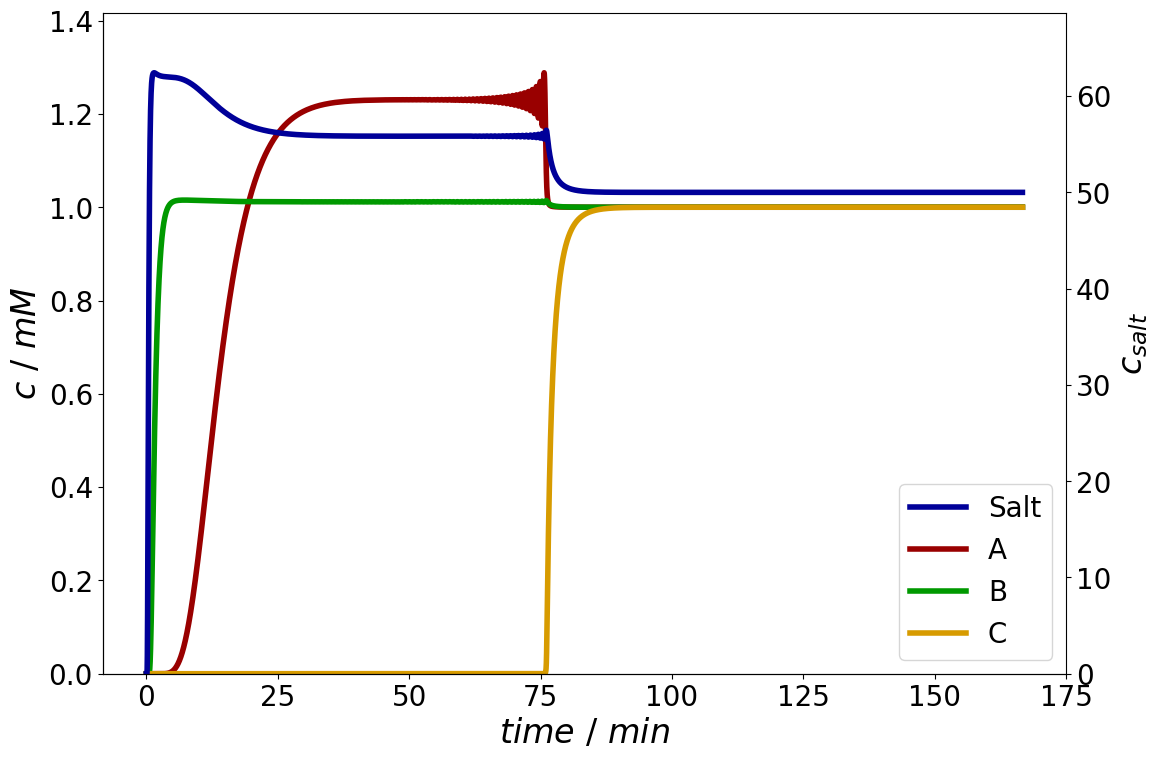

In [16]:
from CADETProcess.plotting import SecondaryAxis

sec = SecondaryAxis()
sec.components = ['Salt']
sec.y_label = '$c_{salt}$'

_ = sim_results.solution.outlet.outlet.plot(secondary_axis=sec)

## Bonus Exercise

There are many other models implemented in `CADET`.
Some binding models can account for multiple binding states, others allow for mobile phase modulators.
Moreover, binding models can use external functions for modifying the values of the parameters during the simulation.
This could be used to model other effects like temperature that have an influence on the binding strength.

Try implementing some of the more advanced isotherms and features.